# Principal component analysis
> PCA is a dimensionality reduction and machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends.

In [88]:
import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0



In [89]:
df

feature1  feature2  feature3  target
0   0.666988  0.025813 -0.777619       1
1   0.948634  0.701672 -1.051082       1
2  -0.367548 -1.137460 -1.322148       1
3   1.772258 -0.347459  0.670140       1
4   0.322272  0.060343 -1.043450       1
5  -1.009942  0.441736  1.128877       1
6  -1.838068 -0.938769 -0.201841       1
7   1.045371  0.538162  0.812119       1
8   0.241106 -0.952510 -0.136267       1
9   1.267248  0.173634 -1.223255       1
10  1.415320  0.457711  0.728876       1
11  1.968435 -0.547788 -0.679418       1
12 -2.506230  0.146960  0.606195       1
13 -0.022539  0.013422  0.935945       1
14  0.420623  0.411620 -0.071324       1
15 -0.045438  1.040886 -0.094035       1
16 -0.420844 -0.551989 -0.121098       1
17  0.190141  0.512137  0.131538       1
18 -0.331617 -1.632386  0.619114       1
19 -0.992574 -0.161346  1.192404       1

In [90]:
df1

feature1  feature2  feature3  target
0   1.250737  0.186384  1.703624       0
1   0.731858  0.517441  2.244610       0
2   1.676860  4.187503 -0.080565       0
3   1.010229  1.437830  2.327788       0
4   0.748855  2.593111  1.170818       0
5   0.290746  0.866975  0.982643       0
6   0.898907  0.435960  0.820964       0
7   2.011059  1.920996  2.933090       0
8   0.204637 -0.011535  3.150780       0
9   1.425140  1.441152  0.182561       0
10  1.437892  1.099723  1.065406       0
11  2.224431  0.230401  1.192120       0
12 -0.723253  1.461259 -0.085367       0
13  2.823378 -0.332863  2.637391       0
14  0.177061 -0.598109  1.226512       0
15  1.233898  0.052778 -0.261576       0
16 -1.389866  0.666726  1.343517       0
17 -1.027861  1.131416  2.603234       0
18 -0.764314  1.566504  1.548788       0
19  0.384865  1.323546 -0.103193       0

In [91]:
df = pd.concat([df, df1], ignore_index=True)

In [92]:
# If df might not be defined yet, initialize it as an empty DataFrame with appropriate columns
if 'df' not in locals():
    df = pd.DataFrame(columns=['feature1', 'feature2', 'feature3', 'target'])

# Assuming df1 is defined as per your snippet
df = pd.concat([df, df1], ignore_index=True)

In [93]:
df = df.sample(40)

In [94]:
df = df.sample(40, random_state=1)

In [95]:
df.head()

feature1  feature2  feature3  target
1   0.948634  0.701672 -1.051082       1
38 -0.764314  1.566504  1.548788       0
19 -0.992574 -0.161346  1.192404       1
40  1.250737  0.186384  1.703624       0
21  0.731858  0.517441  2.244610       0

In [96]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [97]:

# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [98]:

# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.18331431 0.00550246]
 [0.18331431 1.02564103 0.17466252]
 [0.00550246 0.17466252 1.02564103]]


In [99]:

# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [100]:
eigen_values

array([1.28160585, 1.020145  , 0.77517223])

In [101]:

eigen_vectors

array([[-0.51420659, -0.68979868,  0.50967575],
       [-0.70325903, -0.00105082, -0.71093293],
       [-0.49093617,  0.72400047,  0.48456681]])

In [ ]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [103]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [105]:
pc = eigen_vectors[0:2]
pc

array([[-0.51420659, -0.68979868,  0.50967575],
       [-0.70325903, -0.00105082, -0.71093293]])

In [106]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

PC1       PC2  target
0 -1.160359  0.848464       1
1  0.317086  0.241636       0
2  1.388150  0.626870       1
3  0.338293 -1.166662       0
4  0.623833 -1.187686       0

In [ ]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     

# PCA 

In [107]:
import numpy as np
import pandas as pd

In [108]:
df = pd.read_csv("C:\\Users\\DESKTOP\\Downloads\\train.csv")

In [109]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [110]:
df.shape

(42000, 785)

In [111]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
39020      4       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
39020       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
39020         0         0         0         0         0  

[1 rows x 785 columns]

In [112]:
import matplotlib.pyplot as plt

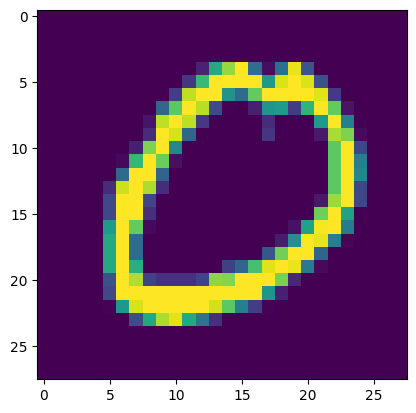

In [113]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [114]:
X = df.iloc[:,1 :]
y = df.iloc[:,0]



In [115]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [117]:
X_train.shape

(33600, 784)

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn = KNeighborsClassifier()

In [120]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
import time 
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

9.7843599319458


In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9452380952380952

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [137]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
# PCA

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [140]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [141]:
X_train.shape

(33600, 784)

In [142]:
knn = KNeighborsClassifier()

In [143]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [144]:
y_pred = knn.predict(X_test)

In [145]:
accuracy_score(y_test,y_pred)

0.9391666666666667

In [161]:
# transforming to a 2D coordinate system

In [162]:
pca = PCA(n_components=2)
X_train_trf =pca.fit_transform(X_train)

In [163]:
X_test_trf =pca.transform(X_test) 

In [164]:
X_train_trf


array([[-2.71862131, -0.48950771],
       [-0.6769544 , -6.75332068],
       [-3.0333073 ,  6.50896116],
       ...,
       [ 2.14883998,  0.78055715],
       [ 1.05956723,  0.94770731],
       [17.70248   ,  1.96099169]])

In [165]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [166]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [167]:
X_train_trf

array([[-2.71863934, -0.48977347,  1.1354452 ],
       [-0.67695758, -6.75432661, -2.33534833],
       [-3.03323887,  6.51011853,  7.49145345],
       ...,
       [ 2.14881614,  0.78085626, -0.74720248],
       [ 1.05956014,  0.94791874,  3.94959656],
       [17.70259323,  1.96182947, -4.94369613]])

In [170]:

y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,
                 x=X_train_trf[:,0], 
                 y=X_train_trf[:,1], 
                 z=X_train_trf[:,2],
                 color=y_train_trf,
                )
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))

fig.show()

In [171]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023389, 26.74459613])

In [172]:
pca.components_

array([[ 4.95358911e-18, -3.20502426e-19,  2.47560213e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-5.17826179e-17,  1.59044837e-17, -2.11493519e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 6.03244846e-18, -1.63384845e-17, -8.35458031e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [173]:
pca.components_.shape


(3, 784)

In [174]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [175]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [176]:
pca.explained_variance_.shape

(784,)

In [177]:
pca.components_.shape

(784, 784)

In [178]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [179]:

np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

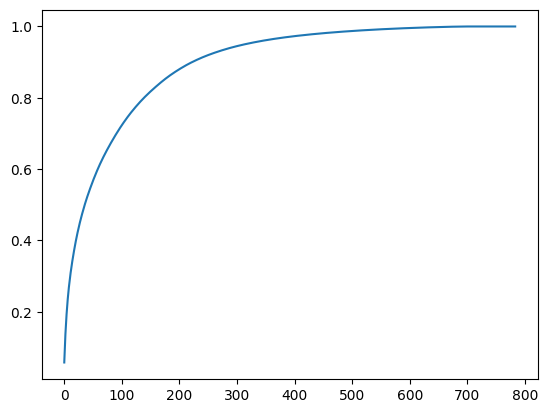

In [180]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [182]:
# Ex

In [181]:
# Data Loading
import pandas as pd

wine = pd.read_csv("C:\\Users\\DESKTOP\\Downloads\\winequalityN - winequalityN.csv")
wine.head(1)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   

   chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
0      0.045                 45.0                 170.0    1.001  3.0   

   sulphates  alcohol  quality  
0       0.45      8.8        6

In [183]:
df.shape

(42000, 785)

In [228]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [229]:
# Checking for Nan Values
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [230]:
# Checking for duplicated data
wine.duplicated().sum()

1168

In [232]:
# We need to remove duplicated rows and missing value rows
import pandas as pd


print("Wine Data Shape :", wine.shape)
# Drop rows with missing values
wine_data = wine.dropna()

# Dropping Duplicates rows
wine_data.drop_duplicates(inplace=True)
print("Wine Data Shape (After Dropping-) :", wine_data.shape)

Wine Data Shape : (6497, 13)
Wine Data Shape (After Dropping-) : (5295, 13)


C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_11392\3319596242.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [233]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
26041      1       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
26041       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
26041         0         0         0         0         0  

[1 rows x 785 columns]

In [234]:
import matplotlib.pyplot as plt

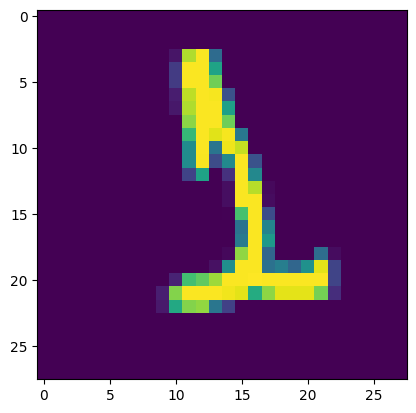

In [235]:
plt.imshow(df.iloc[29748,1:].values.reshape(28,28))

In [236]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [238]:
X_train.shape

(33600, 784)

In [239]:
from sklearn.neighbors import KNeighborsClassifier

In [240]:
knn = KNeighborsClassifier()

In [241]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [242]:
y_pred = knn.predict(X_test)


In [244]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [245]:
# apply PCA

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [247]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [248]:
from sklearn.decomposition import PCA

In [249]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [250]:
pca.explained_variance_.shape

(784,)

In [251]:
pca.components_.shape

(784, 784)

In [252]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

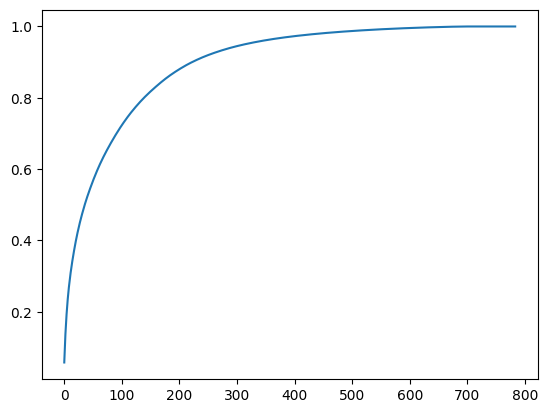

In [253]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [297]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=215)

In [298]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [299]:
X_train_trf.shape

(33600, 215)

In [300]:
knn = KNeighborsClassifier()

In [301]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [302]:
y_pred = knn.predict(X_test_trf)

In [303]:
accuracy_score(y_test,y_pred)

0.9502380952380952